In [1]:
import editdistance as ed
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

from collections import Counter, OrderedDict

import pickle

In [2]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1, -1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [3]:
def squash(od, t, verbose =False):
    answ = OrderedDict()
    sp_to_n = {}
    index = 0
    
    for init_item in tqdm_notebook(od.items()):
        #ord_dict.pop(init_item[0])

        if len(answ) == 0 :
            print("new spacer:", init_item[0], init_item[1])
            answ[init_item[0]] = init_item[1]
            sp_to_n[init_item[0]] = index
            index += 1
        else:
            min_ed, answ_item = find_closest(answ, init_item[0], t)
            if min_ed < t:
                answ[answ_item[0]] += init_item[1]
                sp_to_n[init_item[0]] = sp_to_n[answ_item[0]]
                if verbose: print("add:", init_item[0], "to", answ_item[0], answ[answ_item[0]])
            else:
                sp_to_n[init_item[0]] = index
                index += 1
                answ[init_item[0]] = init_item[1]
                if verbose: print("new spacer:", init_item[0], init_item[1])
    return answ, sp_to_n

            

In [4]:
def process_pair(pair, cl_to_num, t = 6):
    try:
        return [cl_to_n[find_closest(cl_to_num, pair[0], t)[1][0]], cl_to_n[find_closest(cl_to_num, pair[1], t)[1][0]]]
    except:
        return [-1, -1]

In [5]:
LEN = 22

In [7]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

pairs_path = "../../data/ES/ES1_R1_pairs.txt"
lines_path = "../../data/ES/ES1_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

#pairs_path = "../data/SlO_15/SlO1_R1_pairs_15.txt"
#lines_path = "../data/SlO_15/SlO1_R1_spacers_15.txt"

# pairs_path = "../../data/Sasha/Sasha1_pairs.txt"
# lines_path = "../../data/Sasha/Sasha1.fasta"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

with open(lines_path) as f:
    lines = [x[:LEN] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:LEN] for y in x[:-2].split(' ') ] for x in f.readlines()]

lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

159654


In [8]:
print(len(pairs) * 2)

159654


In [9]:
counter = Counter(lines)
ord_dict = OrderedDict()

u_lines = []
counts = []
for item in counter.items():
    u_lines.append(item[0])
    counts.append(item[1])
    
u_lines = np.array(u_lines)
counts = np.array(counts)

args_s = np.argsort(counts)[::-1]

for l, c in zip(u_lines[args_s], counts[args_s]):
    ord_dict[l] = c


In [10]:
sp_to_n = {}

nd, sp_to_n = squash(ord_dict, 6)

cl_to_n = {}
n_to_clust = {}
for i, it in enumerate(nd.items()):
    cl_to_n[it[0]] = i
    n_to_clust[i] = it[0]

A Jupyter Widget

new spacer: GAAATGCTGGTGAGCGTTAATG 18451



In [11]:
len(cl_to_n)

50

In [12]:
len(pairs)


79827

In [13]:
pairs_n = [process_pair(p, cl_to_n) for p in tqdm_notebook(pairs)]

A Jupyter Widget

In [14]:
graph = np.zeros((len(cl_to_n),len(cl_to_n)))

err = 0
for p in pairs_n:
    if len(p) == 2 and sum(p) != -2:
        graph[p[0]][p[1]] += 1  
        #graph[p[1]][p[0]] +=1
    else:
        err += 1
err

0

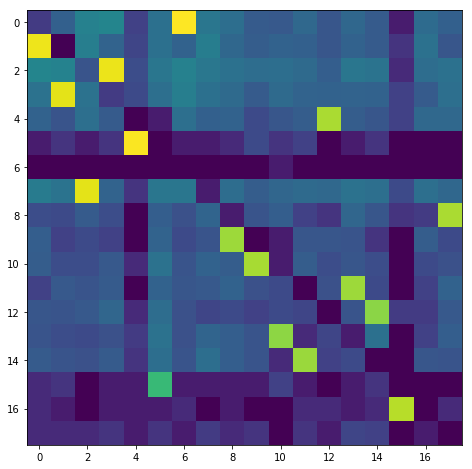

In [17]:
plt.figure(figsize=(8,8))
plt.imshow(np.log(graph+1)[:18, : 18])
plt.show()

In [21]:
graph.sum(1).astype(int)

array([10284, 19559,  5495,  4218, 10761,  3242,  3342,  3380,  2544,
        2156,  1486,    10,  2049,  1384,  1461,   876,     7,  1098,
         142,   297,   124,    88,   105,    82,    23,    46,    61,
          71,    65,     1,    54,    41,    34,    21,     0,     0,
           0,     1,     9,     0,     0,     1,     0,     0,     0,
           1,     1,     0,     1,     1,     0,     1,     0,     0,
           0,     0,     2,     1,     1])

In [15]:
# pickle.dump(nd, open("../data/dicts/Vesuvious_III_counts_22", 'wb'))
# pickle.dump(sp_to_n, open("../data/dicts/Vesuvious_III_sp_to_n_22", 'wb'))
# pickle.dump(n_to_clust, open("../data/dicts/Vesuvious_III_n_to_cl_22", 'wb'))

In [96]:
graph[:17, : 17].sum() / graph[17:35,17:35].sum() 

71.32494969818913

In [97]:
big_w = graph[np.arange(graph.shape[0]),graph.argmax(1)].astype(int)

In [98]:
big_w[:17].sum() / (big_w[17:35].sum() + 200)

28.799635701275047

In [100]:
graph.argmax(1)[:17]

array([ 3,  0,  5,  6,  2,  7,  8, 11,  9, 10, 13,  0, 16, 14, 15, 17, 10])